In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:

data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv('./dataset/test.csv')

Well look at some of the data

In [110]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [111]:
data.shape

(2000, 21)

seeing if there is any null in the data


In [112]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

What are the data types of the columns

In [113]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [114]:
data.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


In [115]:
data['blue']

0       0
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    0
1998    0
1999    1
Name: blue, Length: 2000, dtype: int64

In [116]:
data['blue'] = data['blue'].astype(object)

In [117]:
data.corr().style.background_gradient(cmap = "Blues")

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
clock_speed,0.011482,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399
pc,0.031441,-0.005245,-0.017143,0.644595,-0.005598,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,-0.001322,-0.008742,0.005389,0.033599


In [118]:
columns = data.columns[data.any()].tolist()
a = []
b = []
for item in columns:
  a.append(data[item].min())
  b.append(data[item].max())
df = pd.DataFrame(columns, columns = ['Col'])
df['min']= a
df['max'] = b

#Droping unnessesary parameters

data= data.drop(["clock_speed","fc", "m_dep","mobile_wt","n_cores","pc", "talk_time", "three_g", "touch_screen", "blue"], axis=1)
data


,battery_power,dual_sim,four_g,int_memory,px_height,px_width,ram,sc_h,sc_w,wifi,price_range
0,842,0,0,7,20,756,2549,9,7,1,1
1,1021,1,1,53,905,1988,2631,17,3,0,2
2,563,1,1,41,1263,1716,2603,11,2,0,2
3,615,0,0,10,1216,1786,2769,16,8,0,2
4,1821,0,1,44,1208,1212,1411,8,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,2,1222,1890,668,13,4,0,0
1996,1965,1,0,39,915,1965,2032,11,10,1,2
1997,1911,1,1,36,868,1632,3057,9,1,0,3
1998,1512,0,1,46,336,670,869,18,10,1,0


In [119]:
# get columns whose min is 0 and max is 1
cols = data.columns[(data.min() == 0) & (data.max() == 1)]

# print the selected columns
print(cols)

Index(['dual_sim', 'four_g', 'wifi'], dtype='object')


In [120]:
data[cols] = data[cols].astype('object')
print(data[cols].dtypes)

dual_sim    object
four_g      object
wifi        object
dtype: object


# categorical features



In [121]:
cat_features = [i for i in data.columns if data.dtypes[i]=='object']
cat_features


['dual_sim', 'four_g', 'wifi']

# Numerical Features

In [122]:
num_features = [i for i in data.columns if data.dtypes[i] in ['int64', 'float']]
num_features[: -1]
num_features

['battery_power',
 'int_memory',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'price_range']

In [123]:
data.loc[:,'price_range'].value_counts()



1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:xlabel='price_range', ylabel='count'>

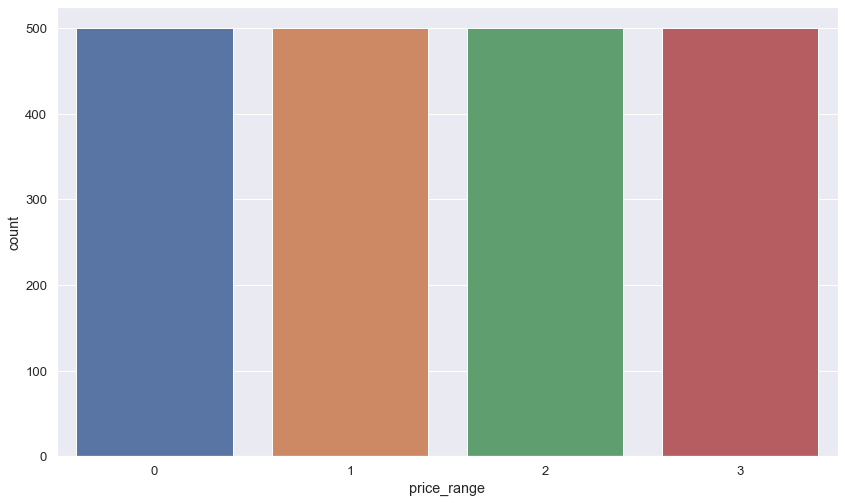

In [124]:
sns.countplot(x = 'price_range',data = data)


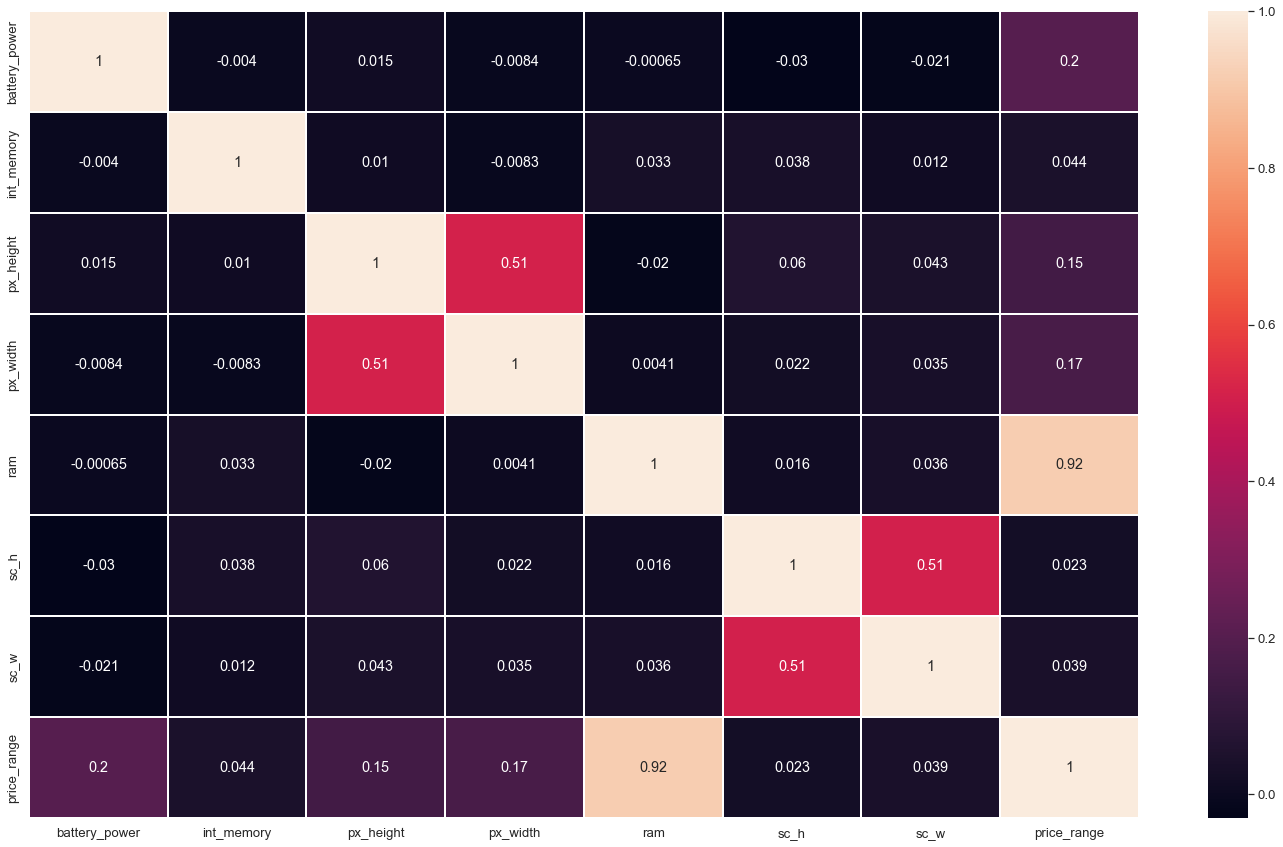

In [125]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot = True, linewidth = 2 )
plt.tight_layout()

<AxesSubplot:title={'center':'Correlation with target feature'}>

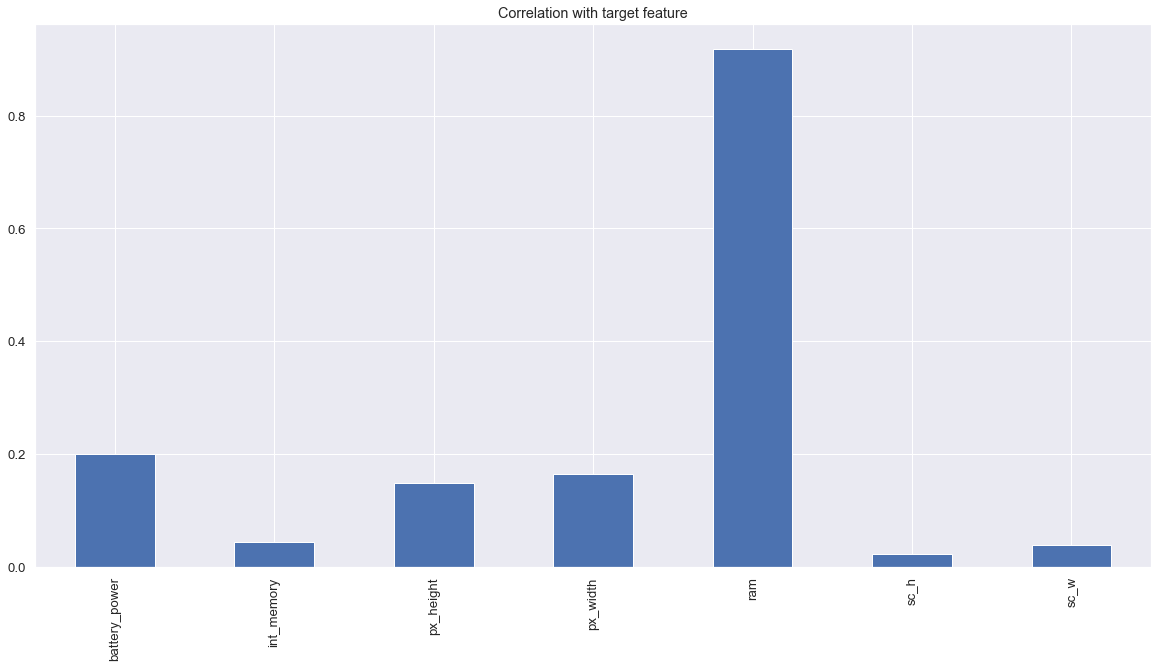

In [126]:
data.drop('price_range', axis=1).corrwith(data.price_range).plot(kind = 'bar', grid = True, figsize=(20,10), 
                                                                 title = 'Correlation with target feature')



# Exploring Numerical Features

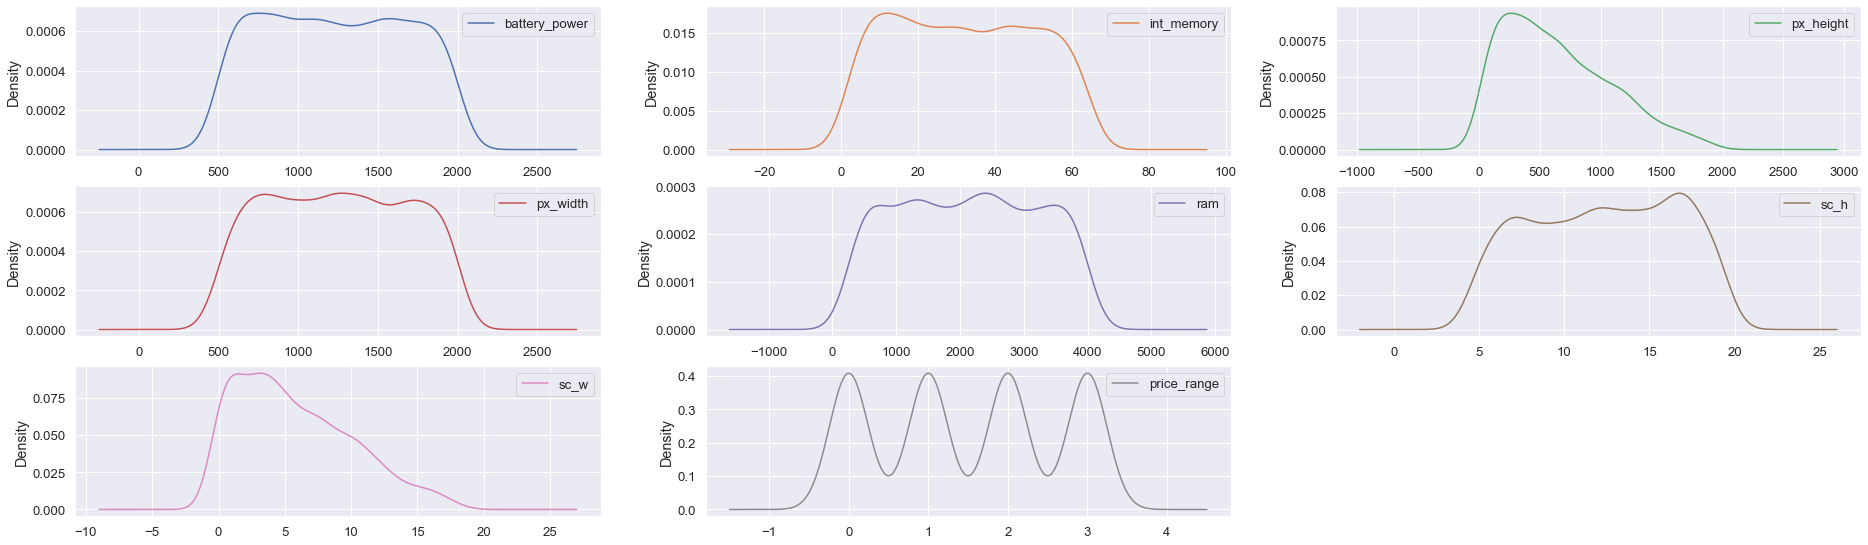

In [127]:
data[num_features].plot(kind='density', layout = (5,3),subplots=True,sharex=False,figsize=(32,16))


plt.show()


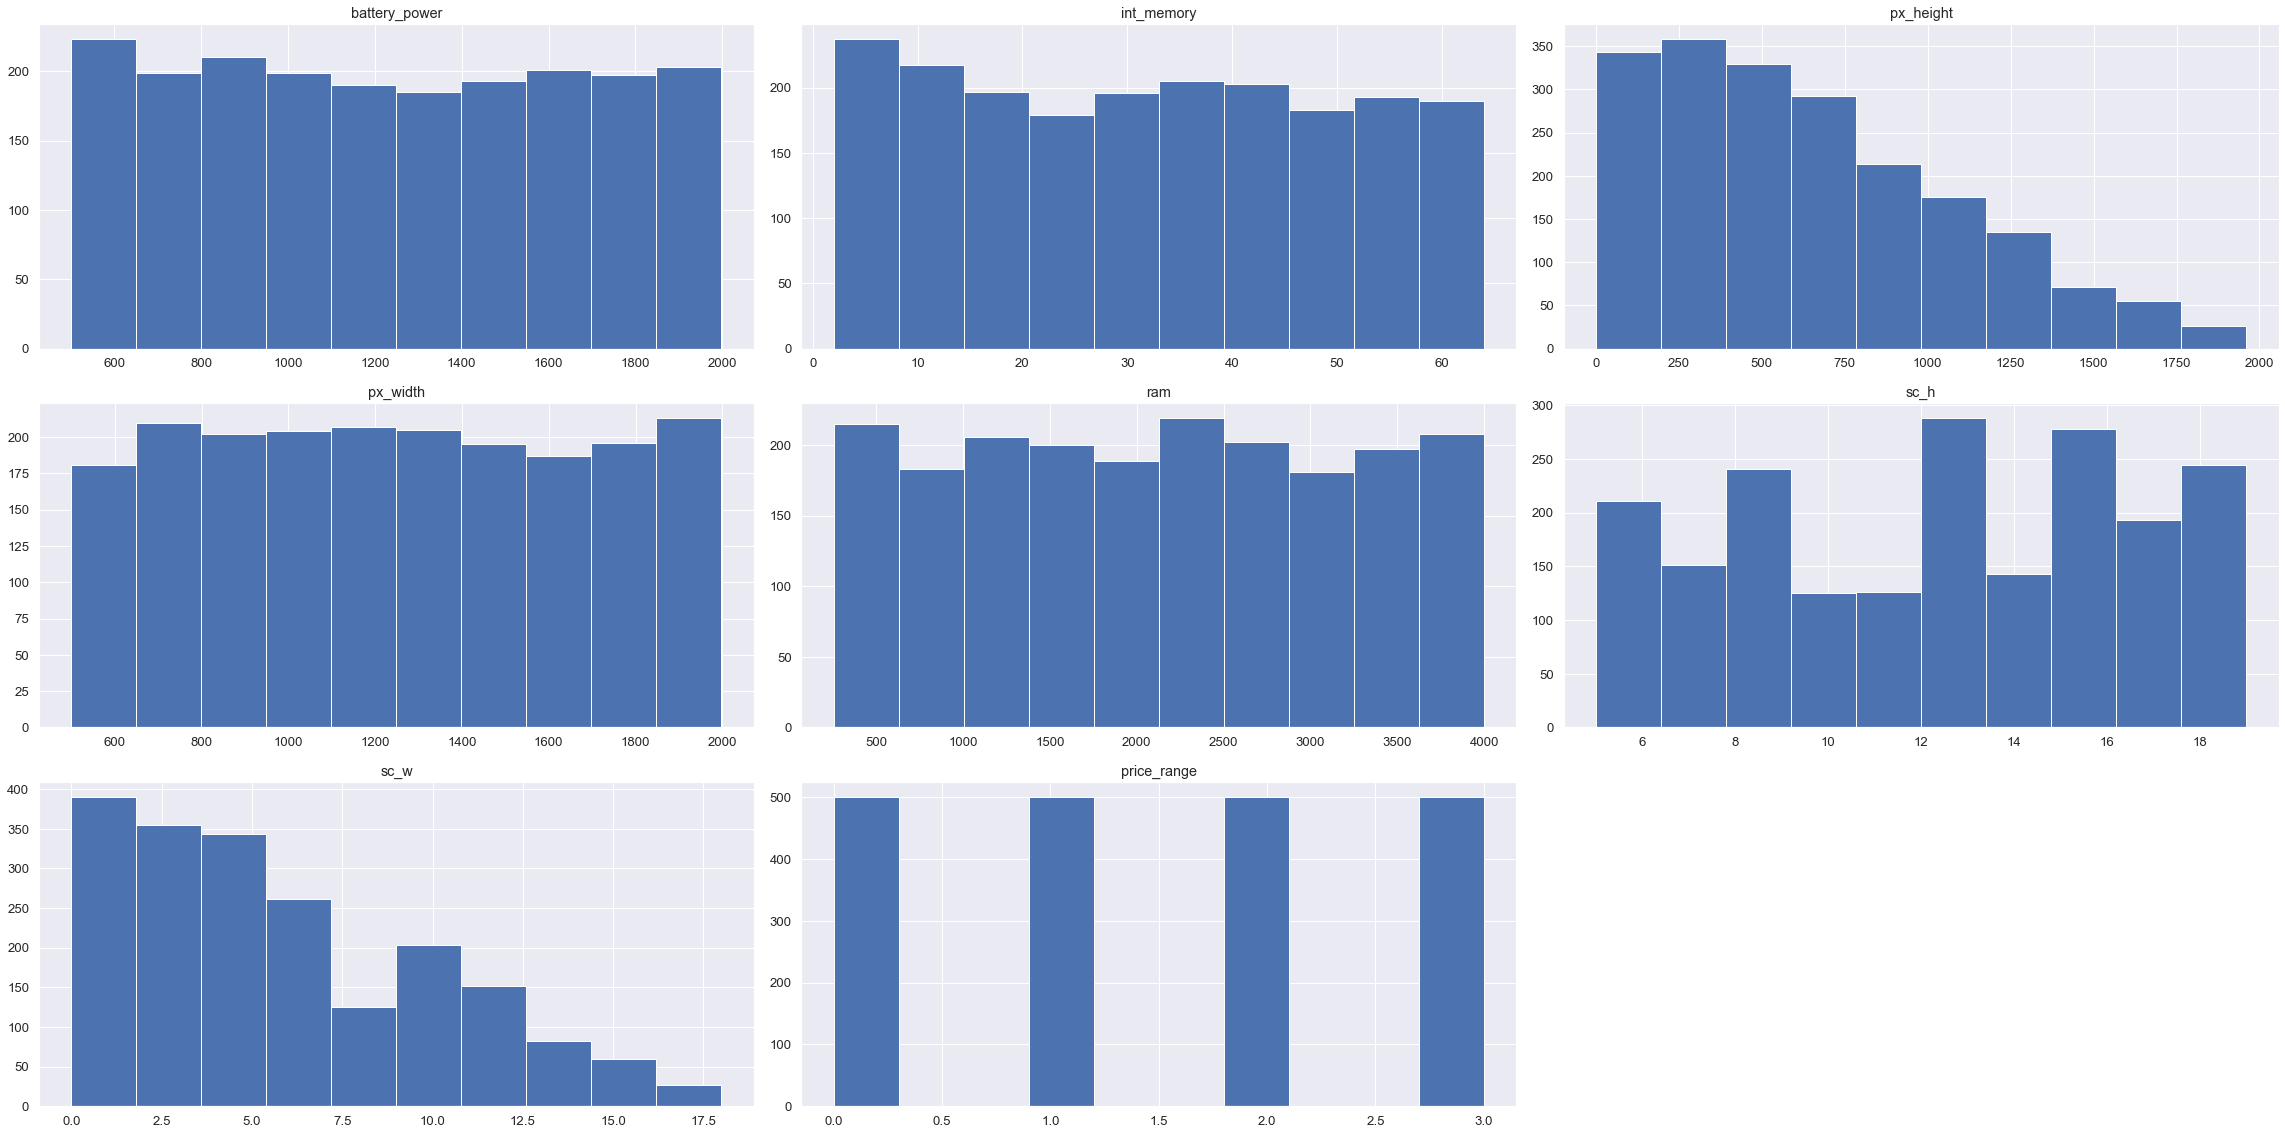

In [128]:
data.hist(figsize=(32,16))
plt.tight_layout()


In [129]:
#cleaning data
#data.describe shows that some values of px_height and sc_w are 0 but generally any mobile device
#doesnot have 0 px_height and 0 sc_w

In [130]:
data[data['px_height']==0]

,battery_power,dual_sim,four_g,int_memory,px_height,px_width,ram,sc_h,sc_w,wifi,price_range
1481,1834,0,1,40,0,1987,3692,13,0,0,3
1933,897,0,1,2,0,994,1958,7,5,0,1


In [131]:
data[data['sc_w']==0]

,battery_power,dual_sim,four_g,int_memory,px_height,px_width,ram,sc_h,sc_w,wifi,price_range
12,1815,0,0,33,607,748,1482,18,0,0,1
24,503,1,1,8,201,1245,2583,11,0,0,1
33,1310,1,1,51,178,1919,3845,7,0,0,3
42,1253,1,1,5,685,714,1878,15,0,0,1
50,1547,1,1,14,1042,1832,2059,5,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
1918,772,1,1,23,317,1805,2782,7,0,0,2
1920,591,1,1,16,892,1603,3746,5,0,0,3
1946,590,1,0,32,227,509,1817,10,0,0,0
1954,686,1,0,36,64,745,1503,10,0,0,0


In [132]:
#changing 0 to nan and using KNN imputer to take care of nan data
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2)
data['px_height'] = data['px_height'].replace(0, np.nan)
data['sc_w'] = data['sc_w'].replace(0, np.nan)

data[['px_height','sc_w']] = imputer.fit_transform(data[['px_height','sc_w']])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


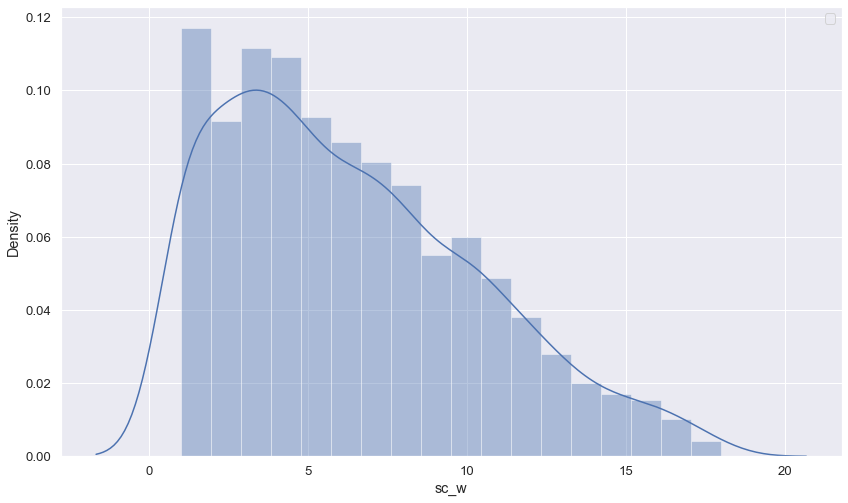

In [133]:
fig = plt.figure(2)
sns.distplot(data['sc_w'])
plt.legend()


In [134]:
data

,battery_power,dual_sim,four_g,int_memory,px_height,px_width,ram,sc_h,sc_w,wifi,price_range
0,842,0,0,7,20.0,756,2549,9,7.0,1,1
1,1021,1,1,53,905.0,1988,2631,17,3.0,0,2
2,563,1,1,41,1263.0,1716,2603,11,2.0,0,2
3,615,0,0,10,1216.0,1786,2769,16,8.0,0,2
4,1821,0,1,44,1208.0,1212,1411,8,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,2,1222.0,1890,668,13,4.0,0,0
1996,1965,1,0,39,915.0,1965,2032,11,10.0,1,2
1997,1911,1,1,36,868.0,1632,3057,9,1.0,0,3
1998,1512,0,1,46,336.0,670,869,18,10.0,1,0


In [135]:
# fig, ax = plt.subplots(3,3,figsize = (16,8))
# sns.countplot(x=num_features[0],hue='price_range', data=data,ax = ax[0,1])
# sns.countplot(x=num_features[1],hue='price_range', data=data,ax = ax[0,2])
# sns.countplot(x=num_features[2],hue='price_range', data=data,ax = ax[1,0])
# sns.countplot(x=num_features[3],hue='price_range', data=data,ax = ax[1,1])
# sns.countplot(x=num_features[4],hue='price_range', data=data,ax = ax[1,2])
# sns.countplot(x=num_features[5],hue='price_range', data=data,ax = ax[2,0])
# sns.countplot(x=num_features[6],hue='price_range', data=data,ax = ax[2,1])

# fig.tight_layout()


In [136]:
def kde_numerical_features(column, target) : 
    fig, ax = plt.subplots(figsize = (5,5))
    sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
    sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
    sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
    sns.kdeplot(data[data[target]==3][column], alpha=0.5,shade = True, color="#fccc79", label='3', ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend()
    plt.show()

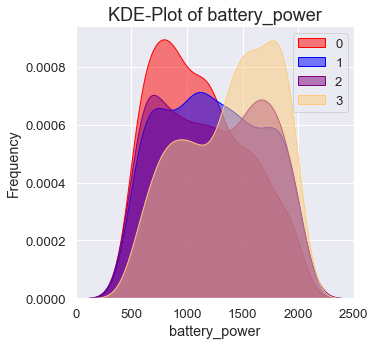

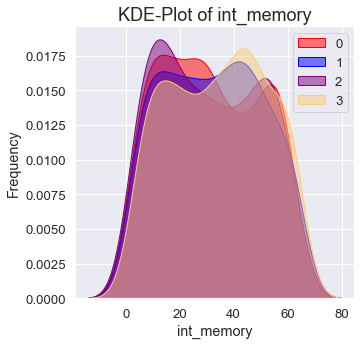

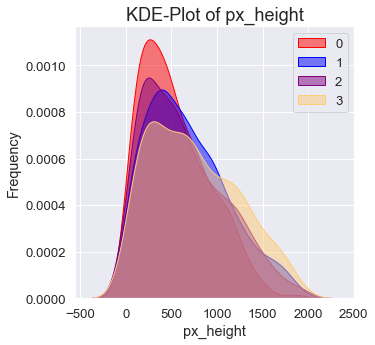

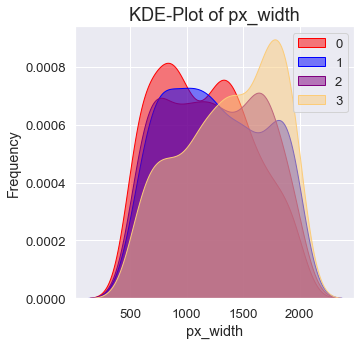

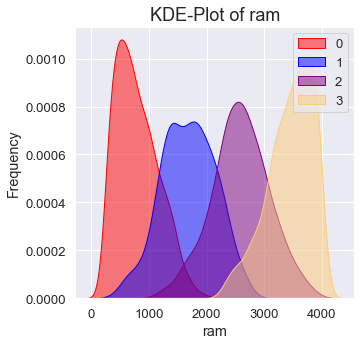

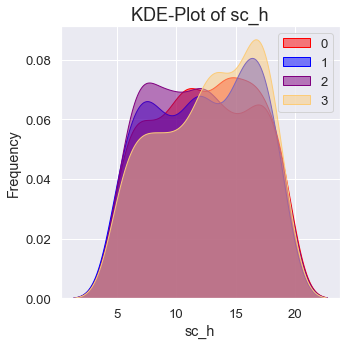

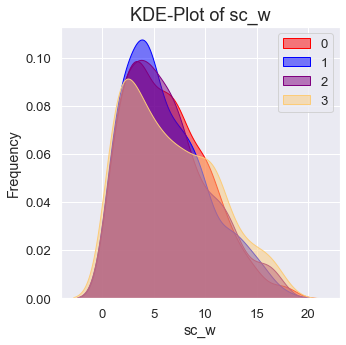

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore a

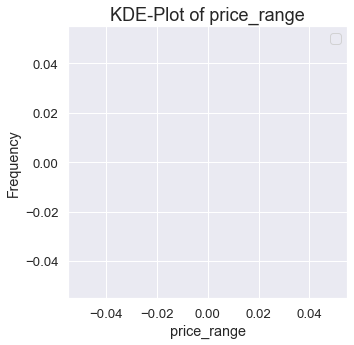

In [137]:
for column in num_features:
    kde_numerical_features(column, "price_range")

In [138]:
#multiclass features

In [139]:
def distribution_categorical_features(data, feature, target) :
    sns.set(rc={'figure.figsize':(14,8.27)},font_scale=1.2)
    grouped_columns = sns.countplot(x=feature, hue=target, data=data)
    grouped_columns.set_title('Countplot for {} {}'.format(target, feature))

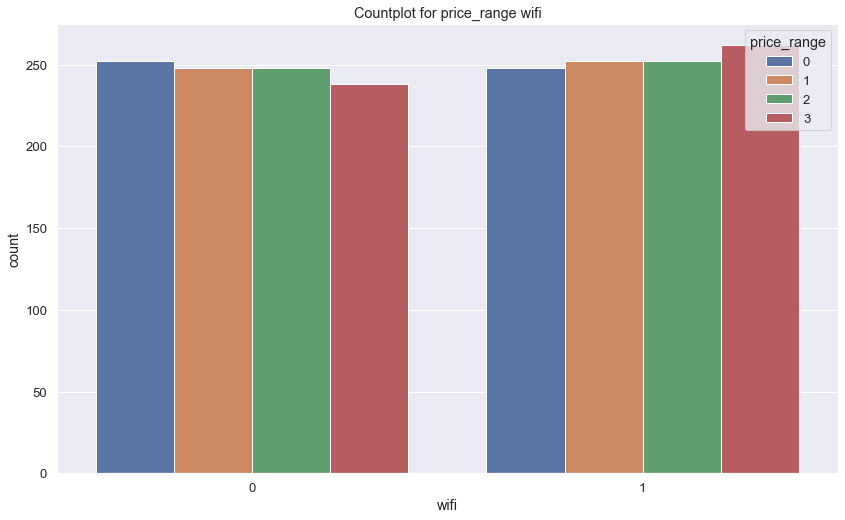

In [140]:
distribution_categorical_features(data, "wifi", "price_range")

In [141]:
# every category of price has almost equal number of no wifi and every category of price_range has almost equal number of wifi containing devices

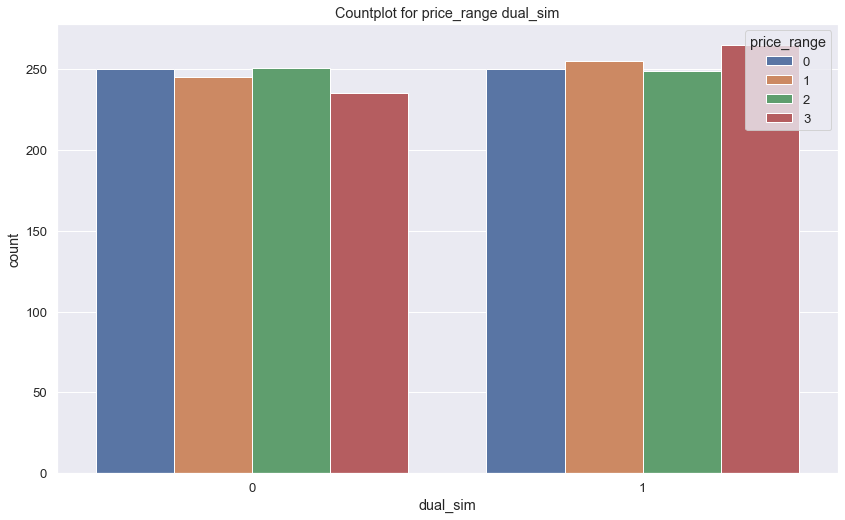

In [142]:
distribution_categorical_features(data, "dual_sim", "price_range")

In [143]:
['blue', 'dual_sim', 'four_g']

['blue', 'dual_sim', 'four_g']

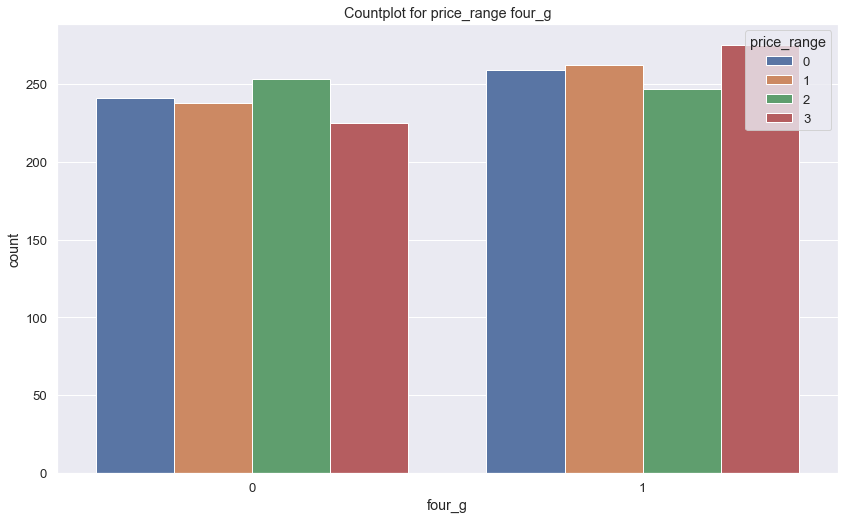

In [144]:
distribution_categorical_features(data, "four_g", "price_range")

# Now for the algorithm implementation


In [145]:
final_df = data[num_features]
X = final_df.drop(columns=['price_range'],axis=1)
y = final_df['price_range']



Scaling data to make good
# important dont scale cat data

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardizer = StandardScaler()
X_scaled_list = standardizer.fit_transform(X)
num_data = np.array(X_scaled_list)
cat_data = np.array(data[cat_features].values.tolist())

In [147]:
X_scaled = np.concatenate((num_data,cat_data), axis=1)
X_scaled = X_scaled.tolist()

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
RANDOM_STATE = 55

In [149]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.25, random_state=42)

In [150]:
""" print(f"target proportion: {sum(y_train)/len(y_train)}") """
y_train

1738    1
548     2
936     3
1389    0
1607    2
       ..
1130    3
1294    0
860     2
1459    3
1126    1
Name: price_range, Length: 1500, dtype: int64

In [151]:
min_samples_split_list = [2,10,30,50,100,200,300,700] #integer gives actual sample quantity
max_depth_list = [1,2,3,4,8,16,32,64,None] # none means that there is no depth limit
n_estimators_list = [10,50,100,200,300,400,500]

# Finding hyperparameter minsamplesforsplitting

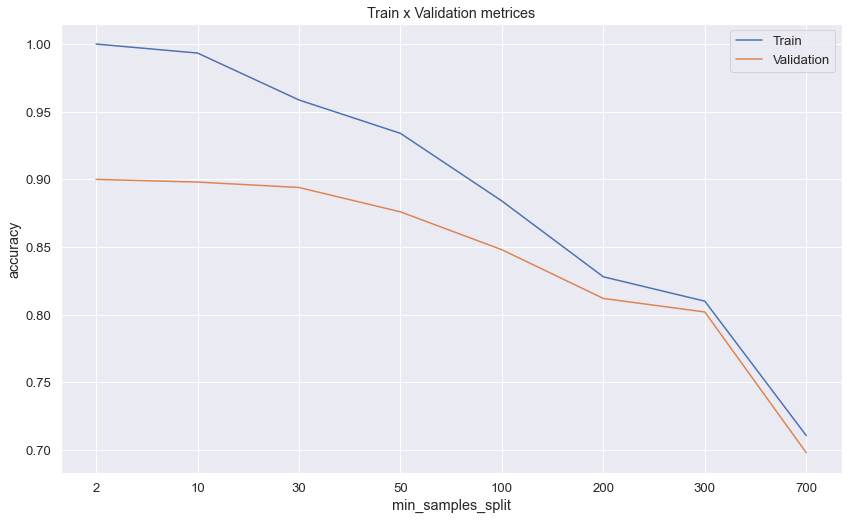

In [152]:
import matplotlib.pyplot as plt
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split= min_samples_split, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title("Train x Validation metrices")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(["Train", "Validation"])

# Increasing min_samples_split 

Reduces the overfitting drastically train accuracy and test accuracy is near so min_sample_split = 200

# Max_depth hyperparameter

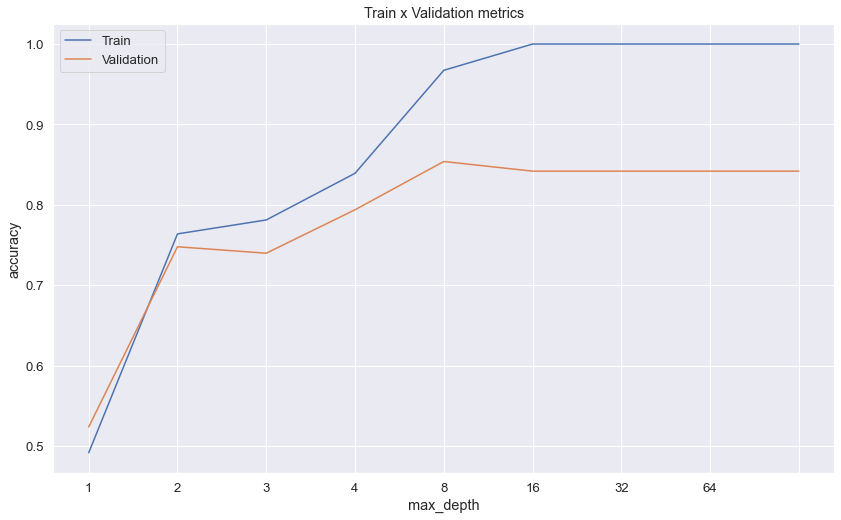

In [153]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# max_depth = 5  ideal case

# n_estimators

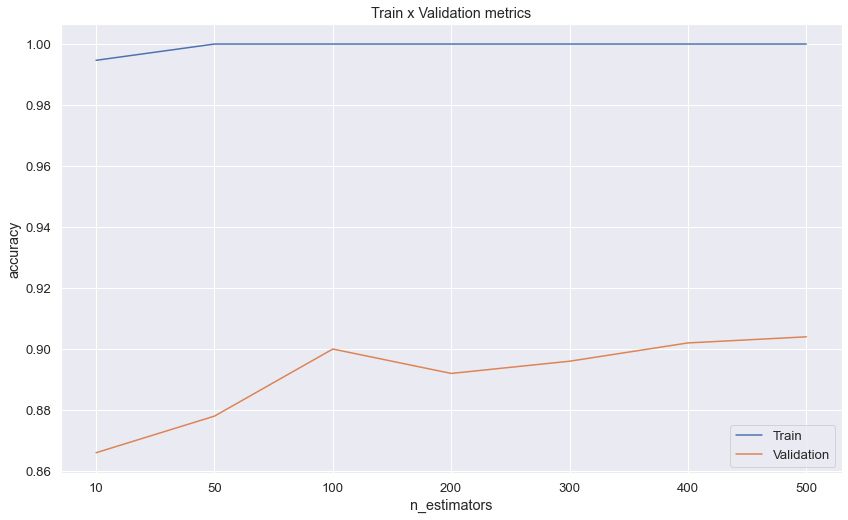

In [154]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
    
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# n_estimators = 400

In [155]:
random_forest_model = RandomForestClassifier(n_estimators = 400, max_depth = 4 , min_samples_split = 300).fit(X_train, y_train)

In [156]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8073
Metrics test:
	Accuracy score: 0.8080


# XG Boost

In [157]:
from xgboost import XGBClassifier
n = int(len(X_train)*0.75) 

In [158]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [159]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state=42)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

[0]	validation_0-mlogloss:1.25335
[1]	validation_0-mlogloss:1.14427
[2]	validation_0-mlogloss:1.05145
[3]	validation_0-mlogloss:0.97291
[4]	validation_0-mlogloss:0.90569
[5]	validation_0-mlogloss:0.84854
[6]	validation_0-mlogloss:0.79821
[7]	validation_0-mlogloss:0.75457
[8]	validation_0-mlogloss:0.71537
[9]	validation_0-mlogloss:0.67944
[10]	validation_0-mlogloss:0.64819
[11]	validation_0-mlogloss:0.62118
[12]	validation_0-mlogloss:0.59527
[13]	validation_0-mlogloss:0.57228
[14]	validation_0-mlogloss:0.55286
[15]	validation_0-mlogloss:0.53579
[16]	validation_0-mlogloss:0.51899
[17]	validation_0-mlogloss:0.50149
[18]	validation_0-mlogloss:0.48406
[19]	validation_0-mlogloss:0.47213
[20]	validation_0-mlogloss:0.46088
[21]	validation_0-mlogloss:0.44858
[22]	validation_0-mlogloss:0.43461
[23]	validation_0-mlogloss:0.42332
[24]	validation_0-mlogloss:0.41202
[25]	validation_0-mlogloss:0.40267
[26]	validation_0-mlogloss:0.39384
[27]	validation_0-mlogloss:0.38618
[28]	validation_0-mlogloss:0.3

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-mlogloss:0.35521
[32]	validation_0-mlogloss:0.34843
[33]	validation_0-mlogloss:0.34294
[34]	validation_0-mlogloss:0.33628
[35]	validation_0-mlogloss:0.33056
[36]	validation_0-mlogloss:0.32696
[37]	validation_0-mlogloss:0.32205
[38]	validation_0-mlogloss:0.31685
[39]	validation_0-mlogloss:0.31202
[40]	validation_0-mlogloss:0.30774
[41]	validation_0-mlogloss:0.30443
[42]	validation_0-mlogloss:0.30014
[43]	validation_0-mlogloss:0.29763
[44]	validation_0-mlogloss:0.29374
[45]	validation_0-mlogloss:0.29201
[46]	validation_0-mlogloss:0.28920
[47]	validation_0-mlogloss:0.28632
[48]	validation_0-mlogloss:0.28437
[49]	validation_0-mlogloss:0.28168
[50]	validation_0-mlogloss:0.27937
[51]	validation_0-mlogloss:0.27747
[52]	validation_0-mlogloss:0.27561
[53]	validation_0-mlogloss:0.27421
[54]	validation_0-mlogloss:0.27214
[55]	validation_0-mlogloss:0.27073
[56]	validation_0-mlogloss:0.27012
[57]	validation_0-mlogloss:0.26867
[58]	validation_0-mlogloss:0.26775
[59]	validation_0-ml

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [160]:
xgb_model.best_iteration

98

In [161]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9713
Metrics test:
	Accuracy score: 0.9080


# logistic Regression

In [162]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_val)

In [163]:
import joblib
joblib.dump(logreg,r'./dataset/lg.sav')

['./dataset/lg.sav']

In [164]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       132
           1       0.94      0.99      0.96       118
           2       0.95      0.93      0.94       120
           3       0.96      0.96      0.96       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [165]:
print(accuracy_score(y_val,y_pred))

0.962


Text(0.5, 527.9871999999999, 'Predicted label')

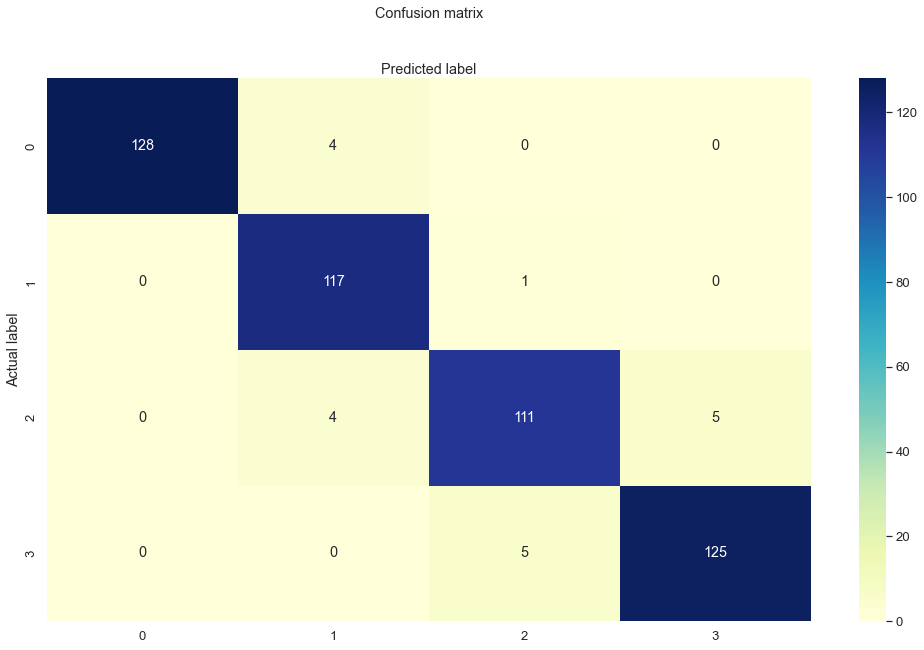

In [166]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



# Linear SVC

In [167]:
linear_svc = LinearSVC()

In [168]:
linear_svc.fit(X_train,y_train)

LinearSVC()

In [169]:
y_pred = model.predict(X_val)

In [170]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       132
           1       0.87      0.92      0.89       118
           2       0.87      0.82      0.85       120
           3       0.92      0.92      0.92       130

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



In [171]:
print(accuracy_score(y_val,y_pred))

0.904


Text(0.5, 527.9871999999999, 'Predicted label')

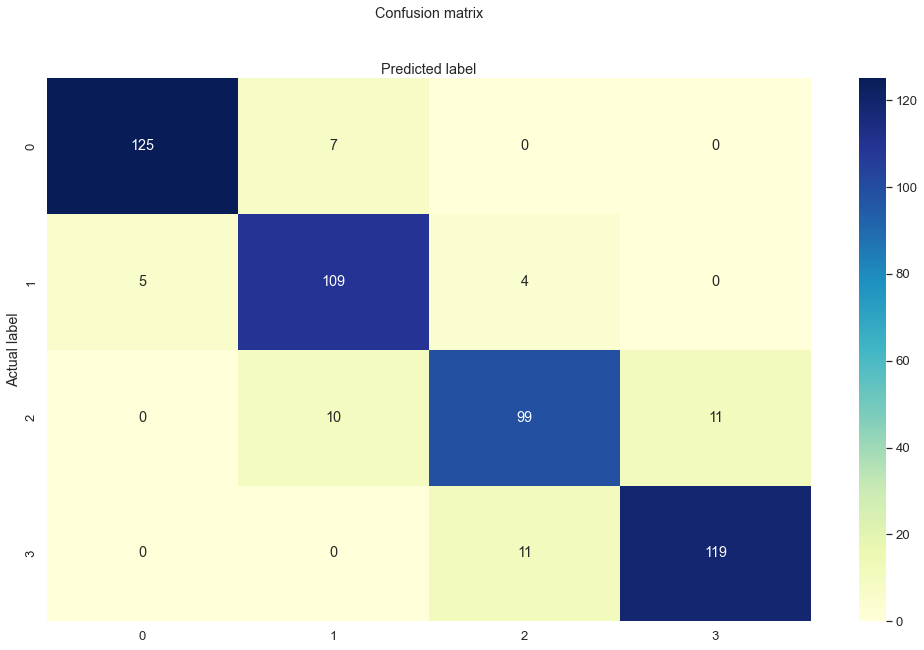

In [172]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# KNeighbour Classifier

In [173]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

# acc = accuracy_score(y_val,y_pred)

# print(acc)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       132
           1       0.58      0.63      0.60       118
           2       0.61      0.63      0.62       120
           3       0.89      0.78      0.83       130

    accuracy                           0.72       500
   macro avg       0.72      0.72      0.72       500
weighted avg       0.73      0.72      0.73       500



# CAT Boosting

In [174]:
import catboost as cb
cb_clf = cb.CatBoostClassifier()

In [175]:
cb_clf.fit(X_train,y_train)

Learning rate set to 0.08078
0:	learn: 1.2731843	total: 5.76ms	remaining: 5.76s
1:	learn: 1.1773804	total: 11.3ms	remaining: 5.65s
2:	learn: 1.0978013	total: 16.7ms	remaining: 5.53s
3:	learn: 1.0378628	total: 27.8ms	remaining: 6.92s
4:	learn: 0.9760717	total: 35ms	remaining: 6.97s
5:	learn: 0.9245092	total: 42.5ms	remaining: 7.04s
6:	learn: 0.8774308	total: 48.6ms	remaining: 6.89s
7:	learn: 0.8272834	total: 53.9ms	remaining: 6.69s
8:	learn: 0.7850553	total: 59.5ms	remaining: 6.55s
9:	learn: 0.7466427	total: 66.9ms	remaining: 6.62s
10:	learn: 0.7094392	total: 71.9ms	remaining: 6.46s
11:	learn: 0.6825994	total: 81.6ms	remaining: 6.72s
12:	learn: 0.6556085	total: 87.3ms	remaining: 6.62s
13:	learn: 0.6293087	total: 92ms	remaining: 6.48s
14:	learn: 0.6051642	total: 97.6ms	remaining: 6.41s
15:	learn: 0.5869281	total: 102ms	remaining: 6.3s
16:	learn: 0.5650766	total: 107ms	remaining: 6.21s
17:	learn: 0.5439713	total: 112ms	remaining: 6.1s
18:	learn: 0.5243689	total: 116ms	remaining: 6.01s
19:

177:	learn: 0.1224894	total: 897ms	remaining: 4.14s
178:	learn: 0.1220927	total: 901ms	remaining: 4.13s
179:	learn: 0.1214023	total: 906ms	remaining: 4.13s
180:	learn: 0.1207472	total: 910ms	remaining: 4.12s
181:	learn: 0.1201402	total: 916ms	remaining: 4.12s
182:	learn: 0.1194196	total: 920ms	remaining: 4.11s
183:	learn: 0.1191044	total: 924ms	remaining: 4.1s
184:	learn: 0.1187261	total: 929ms	remaining: 4.09s
185:	learn: 0.1182285	total: 934ms	remaining: 4.09s
186:	learn: 0.1175958	total: 939ms	remaining: 4.08s
187:	learn: 0.1171672	total: 943ms	remaining: 4.08s
188:	learn: 0.1166945	total: 949ms	remaining: 4.07s
189:	learn: 0.1163096	total: 954ms	remaining: 4.06s
190:	learn: 0.1158968	total: 958ms	remaining: 4.06s
191:	learn: 0.1153541	total: 964ms	remaining: 4.06s
192:	learn: 0.1149795	total: 969ms	remaining: 4.05s
193:	learn: 0.1144400	total: 974ms	remaining: 4.05s
194:	learn: 0.1139202	total: 980ms	remaining: 4.05s
195:	learn: 0.1134111	total: 986ms	remaining: 4.04s
196:	learn: 0

360:	learn: 0.0673163	total: 1.8s	remaining: 3.18s
361:	learn: 0.0671628	total: 1.8s	remaining: 3.17s
362:	learn: 0.0670025	total: 1.81s	remaining: 3.17s
363:	learn: 0.0669315	total: 1.81s	remaining: 3.17s
364:	learn: 0.0668289	total: 1.82s	remaining: 3.16s
365:	learn: 0.0665849	total: 1.82s	remaining: 3.16s
366:	learn: 0.0664914	total: 1.83s	remaining: 3.15s
367:	learn: 0.0662626	total: 1.83s	remaining: 3.15s
368:	learn: 0.0660675	total: 1.84s	remaining: 3.14s
369:	learn: 0.0658619	total: 1.84s	remaining: 3.14s
370:	learn: 0.0657616	total: 1.85s	remaining: 3.13s
371:	learn: 0.0655728	total: 1.85s	remaining: 3.13s
372:	learn: 0.0654173	total: 1.86s	remaining: 3.12s
373:	learn: 0.0652111	total: 1.86s	remaining: 3.12s
374:	learn: 0.0650229	total: 1.87s	remaining: 3.11s
375:	learn: 0.0648705	total: 1.87s	remaining: 3.11s
376:	learn: 0.0646976	total: 1.88s	remaining: 3.1s
377:	learn: 0.0645330	total: 1.88s	remaining: 3.1s
378:	learn: 0.0642505	total: 1.89s	remaining: 3.09s
379:	learn: 0.06

538:	learn: 0.0446241	total: 2.7s	remaining: 2.31s
539:	learn: 0.0445024	total: 2.7s	remaining: 2.3s
540:	learn: 0.0443975	total: 2.71s	remaining: 2.3s
541:	learn: 0.0442881	total: 2.71s	remaining: 2.29s
542:	learn: 0.0442159	total: 2.72s	remaining: 2.29s
543:	learn: 0.0441593	total: 2.72s	remaining: 2.28s
544:	learn: 0.0440655	total: 2.73s	remaining: 2.28s
545:	learn: 0.0439653	total: 2.73s	remaining: 2.27s
546:	learn: 0.0438235	total: 2.74s	remaining: 2.27s
547:	learn: 0.0437138	total: 2.74s	remaining: 2.26s
548:	learn: 0.0436577	total: 2.75s	remaining: 2.26s
549:	learn: 0.0435165	total: 2.75s	remaining: 2.25s
550:	learn: 0.0433782	total: 2.76s	remaining: 2.25s
551:	learn: 0.0433051	total: 2.76s	remaining: 2.24s
552:	learn: 0.0432398	total: 2.77s	remaining: 2.24s
553:	learn: 0.0431779	total: 2.77s	remaining: 2.23s
554:	learn: 0.0431338	total: 2.78s	remaining: 2.23s
555:	learn: 0.0430391	total: 2.78s	remaining: 2.22s
556:	learn: 0.0429441	total: 2.79s	remaining: 2.22s
557:	learn: 0.04

721:	learn: 0.0318028	total: 3.6s	remaining: 1.39s
722:	learn: 0.0317718	total: 3.61s	remaining: 1.38s
723:	learn: 0.0317163	total: 3.61s	remaining: 1.38s
724:	learn: 0.0316567	total: 3.62s	remaining: 1.37s
725:	learn: 0.0316181	total: 3.63s	remaining: 1.37s
726:	learn: 0.0315024	total: 3.63s	remaining: 1.36s
727:	learn: 0.0314287	total: 3.64s	remaining: 1.36s
728:	learn: 0.0313717	total: 3.64s	remaining: 1.35s
729:	learn: 0.0313138	total: 3.65s	remaining: 1.35s
730:	learn: 0.0312497	total: 3.65s	remaining: 1.34s
731:	learn: 0.0312084	total: 3.66s	remaining: 1.34s
732:	learn: 0.0311724	total: 3.67s	remaining: 1.33s
733:	learn: 0.0311510	total: 3.67s	remaining: 1.33s
734:	learn: 0.0311034	total: 3.67s	remaining: 1.32s
735:	learn: 0.0310638	total: 3.68s	remaining: 1.32s
736:	learn: 0.0310296	total: 3.69s	remaining: 1.31s
737:	learn: 0.0310126	total: 3.69s	remaining: 1.31s
738:	learn: 0.0309775	total: 3.7s	remaining: 1.3s
739:	learn: 0.0309402	total: 3.7s	remaining: 1.3s
740:	learn: 0.030

906:	learn: 0.0242333	total: 4.5s	remaining: 461ms
907:	learn: 0.0242108	total: 4.5s	remaining: 456ms
908:	learn: 0.0241973	total: 4.51s	remaining: 451ms
909:	learn: 0.0241423	total: 4.51s	remaining: 446ms
910:	learn: 0.0241288	total: 4.52s	remaining: 441ms
911:	learn: 0.0241053	total: 4.52s	remaining: 436ms
912:	learn: 0.0240879	total: 4.53s	remaining: 431ms
913:	learn: 0.0240276	total: 4.53s	remaining: 426ms
914:	learn: 0.0239970	total: 4.54s	remaining: 421ms
915:	learn: 0.0239756	total: 4.54s	remaining: 416ms
916:	learn: 0.0239581	total: 4.54s	remaining: 411ms
917:	learn: 0.0239054	total: 4.55s	remaining: 406ms
918:	learn: 0.0238763	total: 4.55s	remaining: 401ms
919:	learn: 0.0238616	total: 4.56s	remaining: 396ms
920:	learn: 0.0238399	total: 4.56s	remaining: 391ms
921:	learn: 0.0238029	total: 4.57s	remaining: 386ms
922:	learn: 0.0237702	total: 4.57s	remaining: 381ms
923:	learn: 0.0237363	total: 4.58s	remaining: 377ms
924:	learn: 0.0236895	total: 4.58s	remaining: 372ms
925:	learn: 0.

In [176]:
y_pred = model.predict(X_val)

In [177]:
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       132
           1       0.87      0.92      0.89       118
           2       0.87      0.82      0.85       120
           3       0.92      0.92      0.92       130

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

0.904


Text(0.5, 527.9871999999999, 'Predicted label')

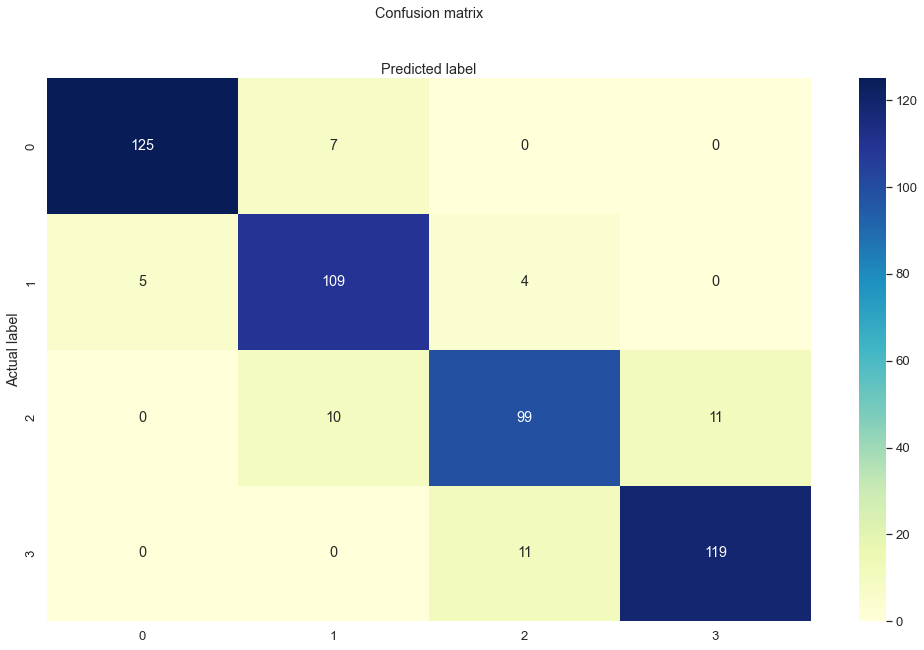

In [178]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# LGBM Classifier

In [179]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)

print(classification_report(y_val,y_pred))



              precision    recall  f1-score   support

           0       0.95      0.94      0.95       132
           1       0.85      0.89      0.87       118
           2       0.86      0.84      0.85       120
           3       0.93      0.93      0.93       130

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



Text(0.5, 527.9871999999999, 'Predicted label')

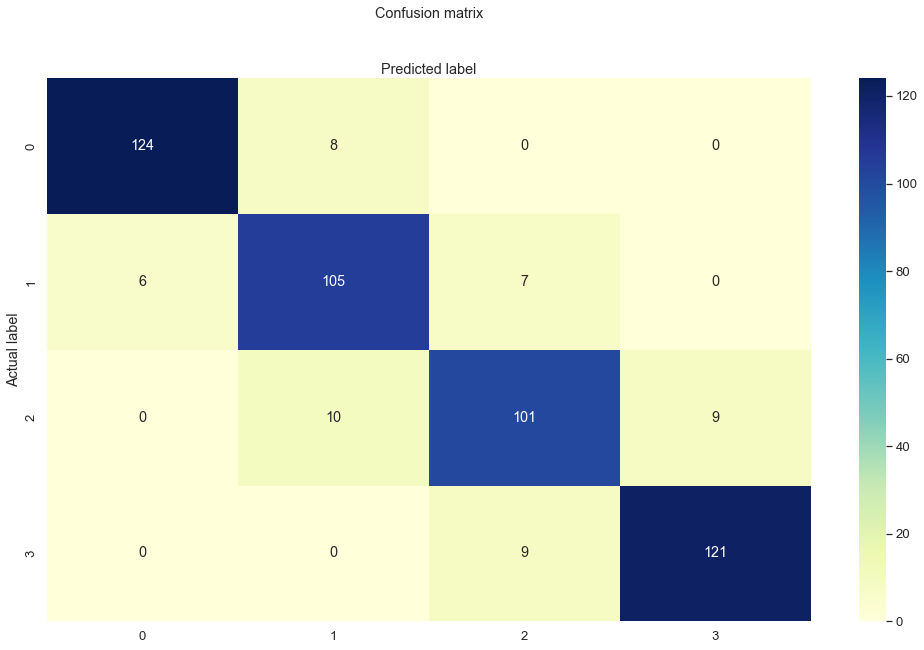

In [180]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [181]:
#Model Building

In [182]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.25, random_state=42)

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


linear_clf = LogisticRegression(C=0.1, solver='sag')
forest_clf = RandomForestClassifier(random_state = 42 , criterion = 'entropy' , n_estimators = 400, max_depth = 5 , min_samples_split = 200)
neighbour_clf = KNeighborsClassifier()
gb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state=42)
lgbm_clf = LGBMClassifier(learning_rate=0.1,max_depth=4,random_state=42)
svc_clf = SVC(gamma="auto", C=1, degree=3, kernel='linear', probability=True)

voting_clf = VotingClassifier(
estimators=[('lr', linear_clf), ('rf', forest_clf),
            ('svc', svc_clf), ('knn', neighbour_clf), 
            ('gb', gb_clf)],
    voting='soft')
models = [
          ("Logistic", linear_clf),
          ("Forest", forest_clf),
          ("KN", neighbour_clf),
          ("GB", gb_clf),
          ("LGBM" , lgbm_clf),
          # ("Cat", CatBoostClassifier()),
          ("SVC", svc_clf),
          ("Soft", voting_clf),
]
cv = 10


def score_models(models, X_train, y_train, cv=cv):
  scores = []
  for model_name, model in models:
    score = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"{model_name}: {np.median(score)}")
    scores.append((model_name, score))
  return scores

scores = score_models(models, X_train, y_train) 

Logistic: 0.9333333333333333
Forest: 0.8233333333333333
KN: 0.7166666666666667
GB: 0.92
LGBM: 0.9
SVC: 0.9466666666666667
Soft: 0.9366666666666666


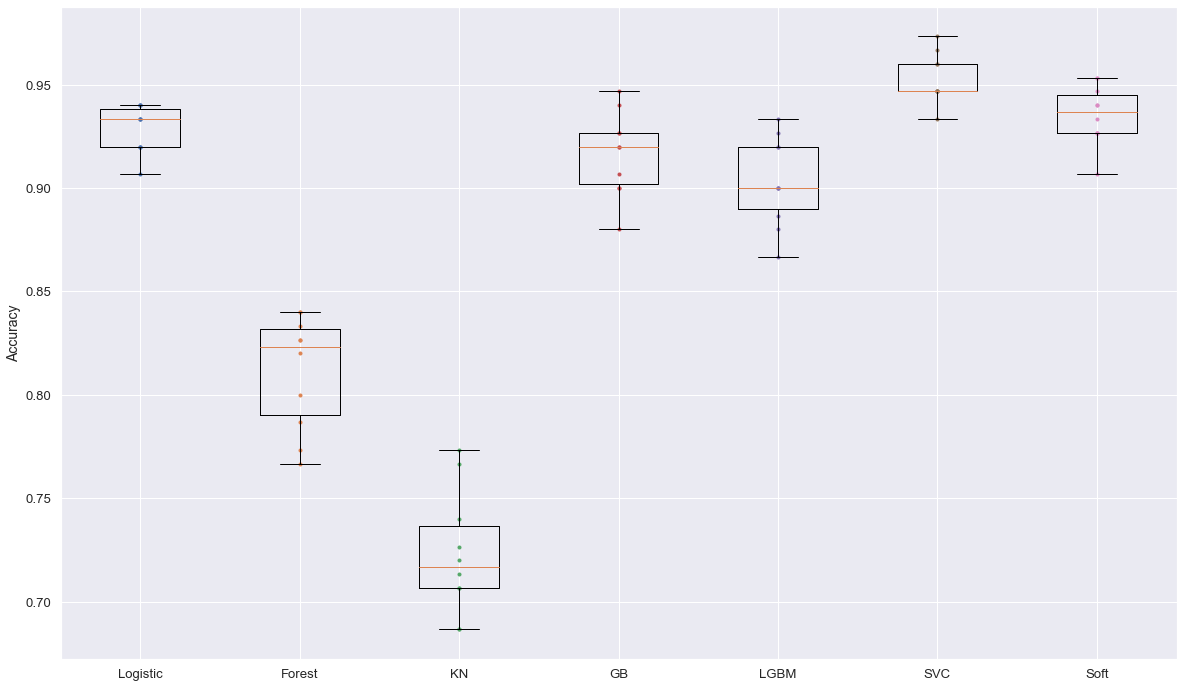

In [188]:
import matplotlib.pyplot as plt

def plot_scores(scores):
  plt.figure(figsize=(20, 12))
  i = 1
  for model_name, score in scores:
    plt.plot([i]*cv, score, ".")
    i += 1

  plt.boxplot([score for _, score in scores], 
              labels=[model_name for model_name, _ in scores])
  plt.ylabel("Accuracy", fontsize=14)
  plt.show()

plot_scores(scores)

In [187]:
import joblib
voting_clf.fit(X_train,y_train)
joblib.dump(voting_clf, 'model.pkl', compress = 1)
joblib.dump(standardizer,'scaler.pkl', compress = 1)

['scaler.pkl']